In [30]:
import pandas as pd
import seaborn as sns

# Read the CSV files into separate DataFrames
df1 = pd.read_csv('movies_data.csv')
df2 = pd.read_csv('movies_data_2.csv')

# Perform the join operation on the common column "Movie Name"
merged_df = df1.join(df2.set_index('Movie Name'), on='Movie Name')
merged_df.index = merged_df.index + 1

In [31]:
merged_df

,Sno,Movie Name,Director1,Director2,Duration,Year,Ratings,Metascore,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross Collection,Popularity,Certification
1,1,The Dark Knight,Christopher Nolan,Christian Bale,152,2008,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,2737930,Action,Crime,Drama,2737930,NaN,UA
2,2,The Lord of the Rings: The Return of the King,Peter Jackson,Elijah Wood,201,2003,9.0,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,1897456,Action,Adventure,Drama,1897456,NaN,U
3,3,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Kemp Powers,140,2023,8.9,86.0,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,179975,Animation,Action,Adventure,179975,NaN,U
4,4,Inception,Christopher Nolan,Leonardo DiCaprio,148,2010,8.8,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,2429596,Action,Adventure,Sci-Fi,2429596,NaN,UA
5,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,Elijah Wood,178,2001,8.8,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,1925886,Action,Adventure,Drama,1925886,NaN,U
6,6,The Lord of the Rings: The Two Towers,Peter Jackson,Elijah Wood,179,2002,8.8,87.0,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,1712386,Action,Adventure,Drama,1712386,NaN,UA
7,7,The Matrix,Lana Wachowski,Lilly Wachowski,136,1999,8.7,73.0,Lana Wachowski,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,1969511,Action,Sci-Fi,NaN,1969511,NaN,A
8,8,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,Mark Hamill,124,1980,8.7,82.0,Irvin Kershner,Mark Hamill,Harrison Ford,Carrie Fisher,1328745,Action,Adventure,Fantasy,1328745,NaN,UA
9,9,Soorarai Pottru,Sudha Kongara,Suriya,153,2020,8.7,NaN,Sudha Kongara,Suriya,Paresh Rawal,Aparna Balamurali,119962,Action,Drama,NaN,119962,NaN,U
10,10,Terminator 2: Judgment Day,James Cameron,Arnold Schwarzenegger,137,1991,8.6,75.0,James Cameron,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,1130058,Action,Sci-Fi,NaN,1130058,NaN,A


In [32]:
merged_df.to_csv('merged_data.csv', index_label='Index')


In [33]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('merged_data.csv')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)


Missing Values:
 Index                0
Sno                  0
Movie Name           0
Director1            0
Director2            0
Duration             0
Year                 0
Ratings              0
Metascore           11
Star1                0
Star2                0
Star3                0
Star4                0
Votes                0
Genre1               0
Genre2               0
Genre3              10
Gross Collection     0
Popularity          50
Certification        1
dtype: int64
Duplicate Rows: 0


In [34]:
# Handle missing values in numeric columns
df['Metascore'].fillna(df['Metascore'].mean(), inplace=True)

# Handle missing values in categorical columns
df['Genre3'].fillna(df['Genre3'].mode()[0], inplace=True)
df['Popularity'].fillna("Unknown", inplace=True)
df['Certification'].fillna("Unknown", inplace=True)


         Duration         Year   Ratings  Metascore         Votes  \
count   50.000000    50.000000  50.00000  39.000000  5.000000e+01   
mean   148.420000  2002.780000   8.42200  79.000000  7.889627e+05   
std     34.320274    18.896377   0.22972  10.452902  7.048410e+05   
min    101.000000  1954.000000   8.20000  58.000000  2.528300e+04   
25%    130.250000  1991.500000   8.20000  71.500000  1.257175e+05   
50%    140.500000  2005.000000   8.35000  78.000000  6.551885e+05   
75%    163.000000  2019.000000   8.60000  86.500000  1.181351e+06   
max    321.000000  2023.000000   9.00000  98.000000  2.737930e+06   

       Gross Collection  
count      5.000000e+01  
mean       7.889627e+05  
std        7.048410e+05  
min        2.528300e+04  
25%        1.257175e+05  
50%        6.551885e+05  
75%        1.181351e+06  
max        2.737930e+06  

Genre1 Counts:
Action       46
Animation     4
Name: Genre1, dtype: int64

Genre1 Percentages:
Action       92.0
Animation     8.0
Name: Genre1

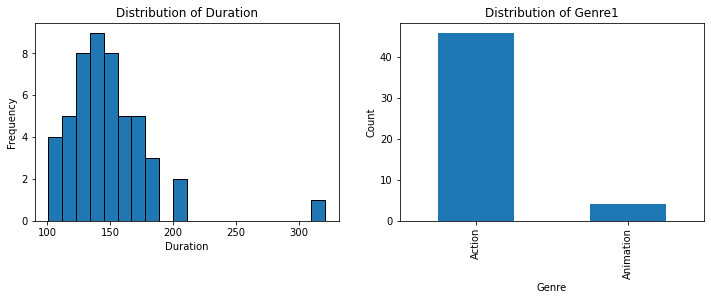

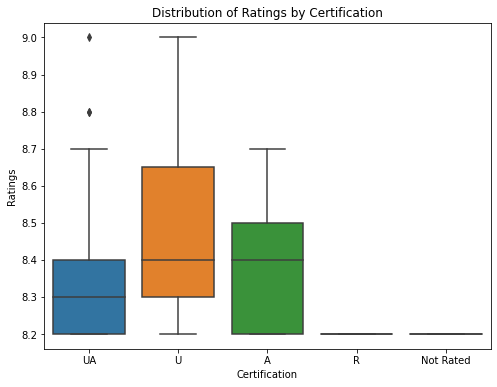

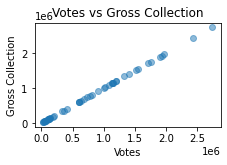

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged dataframe
df = pd.read_csv("merged_data.csv")

# Descriptive Statistics
numeric_columns = ['Duration', 'Year', 'Ratings', 'Metascore', 'Votes', 'Gross Collection']
categorical_columns = ['Genre1', 'Genre2', 'Genre3', 'Certification']

# Summary statistics for numeric columns
numeric_stats = df[numeric_columns].describe()
print(numeric_stats)

# Frequency count and percentage for categorical columns
for column in categorical_columns:
    column_counts = df[column].value_counts()
    column_percentages = df[column].value_counts(normalize=True) * 100
    print(f"\n{column} Counts:\n{column_counts}")
    print(f"\n{column} Percentages:\n{column_percentages}")

# Data Visualization
plt.figure(figsize=(12, 8))

# Histogram of 'Duration'
plt.subplot(2, 2, 1)
plt.hist(df['Duration'], bins=20, edgecolor='black')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')

# Bar plot of 'Genre1'
plt.subplot(2, 2, 2)
genre_counts = df['Genre1'].value_counts()
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genre1')

# Box plot of 'Ratings' by 'Certification'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Certification', y='Ratings')
plt.xlabel('Certification')
plt.ylabel('Ratings')
plt.title('Distribution of Ratings by Certification')
plt.show()

# Scatter plot of 'Votes' vs 'Gross Collection'
plt.subplot(2, 2, 4)
plt.scatter(df['Votes'], df['Gross Collection'], alpha=0.5)
plt.xlabel('Votes')
plt.ylabel('Gross Collection')
plt.title('Votes vs Gross Collection')

plt.tight_layout()
plt.show()


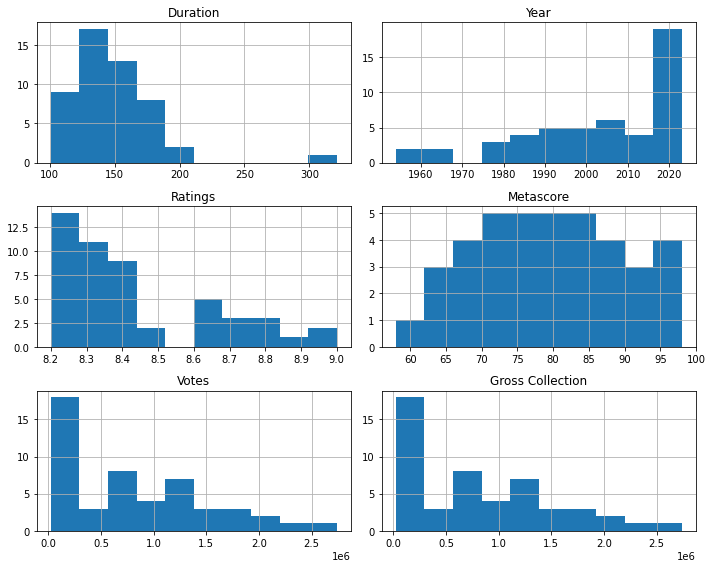

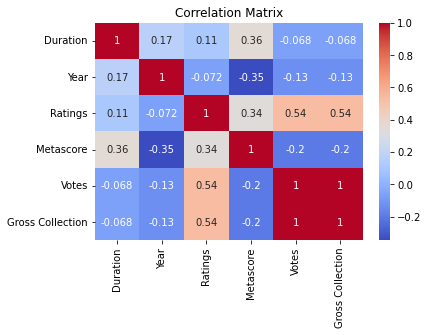

Genre Counts:
 Genre1    50.0
Genre2    50.0
Genre3    40.0
dtype: float64


In [36]:

# Distribution analysis
import matplotlib.pyplot as plt
df[numeric_columns].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Correlation analysis
import seaborn as sns
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Genre analysis
genre_columns = ['Genre1', 'Genre2', 'Genre3']
genre_counts = df[genre_columns].apply(pd.Series.value_counts).sum()
print("Genre Counts:\n", genre_counts)


In [37]:
# Top-rated movies
top_rated_movies = df.nlargest(10, 'Ratings')[['Movie Name', 'Ratings']]
print("Top-rated Movies:\n", top_rated_movies)


Top-rated Movies:
                                           Movie Name  Ratings
0                                    The Dark Knight      9.0
1      The Lord of the Rings: The Return of the King      9.0
2                Spider-Man: Across the Spider-Verse      8.9
3                                          Inception      8.8
4  The Lord of the Rings: The Fellowship of the Ring      8.8
5              The Lord of the Rings: The Two Towers      8.8
6                                         The Matrix      8.7
7     Star Wars: Episode V - The Empire Strikes Back      8.7
8                                    Soorarai Pottru      8.7
9                         Terminator 2: Judgment Day      8.6


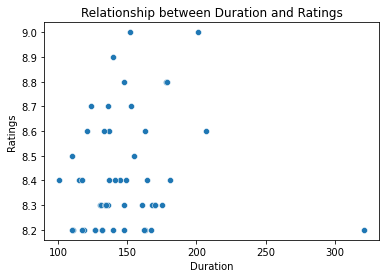

In [38]:
# Relationship between movie duration and ratings
sns.scatterplot(data=df, x='Duration', y='Ratings')
plt.xlabel('Duration')
plt.ylabel('Ratings')
plt.title('Relationship between Duration and Ratings')
plt.show()


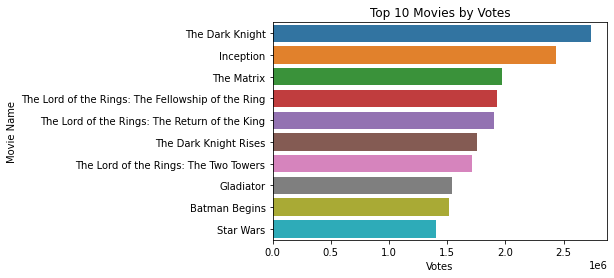

In [39]:

# Popularity of movies based on votes
sns.barplot(data=df.nlargest(10, 'Votes'), x='Votes', y='Movie Name')
plt.xlabel('Votes')
plt.ylabel('Movie Name')
plt.title('Top 10 Movies by Votes')
plt.show()


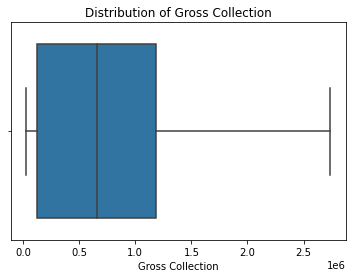

In [40]:

# Gross collection analysis
sns.boxplot(data=df, x='Gross Collection')
plt.xlabel('Gross Collection')
plt.title('Distribution of Gross Collection')
plt.show()


In [41]:

# Director's performance based on ratings
director_ratings = df.groupby('Director1')['Ratings'].mean().sort_values(ascending=False)
print("Director Ratings:\n", director_ratings)


Director Ratings:
 Director1
Joaquim Dos Santos       8.900000
Peter Jackson            8.866667
Sudha Kongara            8.700000
Lana Wachowski           8.700000
Irvin Kershner           8.700000
Hanu Raghavapudi         8.600000
Masaki Kobayashi         8.600000
Christopher Nolan        8.600000
George Lucas             8.600000
James Cameron            8.500000
Luc Besson               8.500000
Ridley Scott             8.500000
Bob Persichetti          8.400000
Park Chan-wook           8.400000
Vetrimaaran              8.400000
Anthony Russo            8.400000
Lokesh Kanagaraj         8.350000
Akira Kurosawa           8.333333
Joseph Kosinski          8.300000
Hayao Miyazaki           8.300000
Rishab Shetty            8.300000
Richard Marquand         8.300000
Alfred Hitchcock         8.300000
Prashanth Neel           8.300000
Ram Kumar                8.300000
Nitesh Tiwari            8.300000
Michael Mann             8.300000
Vishnuvardhan            8.300000
Steven Spielberg   

In [42]:

# Actor's performance based on votes
actor_votes = df.groupby('Star1')['Votes'].sum().sort_values(ascending=False)
print("Actor Votes:\n", actor_votes)


Actor Votes:
 Star1
Christopher Nolan        8432822
Peter Jackson            5535728
Steven Spielberg         2805451
Anthony Russo            2328246
Lana Wachowski           1969511
James Cameron            1866451
Ridley Scott             1544827
George Lucas             1400947
Irvin Kershner           1328745
Luc Besson               1196336
Quentin Tarantino        1146772
James McTeigue           1145261
Richard Marquand         1083420
John McTiernan            905503
Jon Watts                 811801
Michael Mann              682258
Sam Mendes                628119
Akira Kurosawa            611417
Joseph Kosinski           606931
Bob Persichetti           606646
Park Chan-wook            600751
Hayao Miyazaki            409873
Alfred Hitchcock          336151
Nitesh Tiwari             198834
Joaquim Dos Santos        179975
Prashanth Neel            140771
Vishnuvardhan             125421
Sudha Kongara             119962
S.S. Rajamouli            107962
Lokesh Kanagaraj       

   Sno                                         Movie Name           Director1  \
1    1                                    The Dark Knight   Christopher Nolan   
2    2      The Lord of the Rings: The Return of the King       Peter Jackson   
3    3                Spider-Man: Across the Spider-Verse  Joaquim Dos Santos   
4    4                                          Inception   Christopher Nolan   
5    5  The Lord of the Rings: The Fellowship of the Ring       Peter Jackson   

           Director2  Duration  Year  Ratings  Metascore               Star1  \
1     Christian Bale       152  2008      9.0       84.0   Christopher Nolan   
2        Elijah Wood       201  2003      9.0       94.0       Peter Jackson   
3        Kemp Powers       140  2023      8.9       86.0  Joaquim Dos Santos   
4  Leonardo DiCaprio       148  2010      8.8       74.0   Christopher Nolan   
5        Elijah Wood       178  2001      8.8       92.0       Peter Jackson   

               Star2            

array([[<AxesSubplot:title={'center':'Sno'}>,
        <AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Ratings'}>,
        <AxesSubplot:title={'center':'Metascore'}>,
        <AxesSubplot:title={'center':'Votes'}>],
       [<AxesSubplot:title={'center':'Gross Collection'}>,
        <AxesSubplot:title={'center':'Popularity'}>, <AxesSubplot:>]],
      dtype=object)

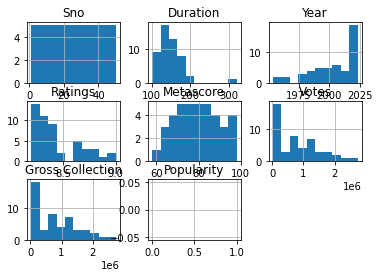

In [44]:
# Display the first few rows of the merged DataFrame
print(merged_df.head())

# Check the data types of columns
print(merged_df.dtypes)

# Summary statistics
print(merged_df.describe())

# Count missing values
print(merged_df.isnull().sum())

# Visualize distributions or relationships using plots (e.g., histograms, scatter plots, etc.)
merged_df.hist()


# Observations of each Analysis


1. Descriptive Statistics:

   - Duration: The movies in the dataset have a minimum duration of 101 minutes and a maximum duration of 321 minutes. The average duration is approximately 148 minutes, with a standard deviation of 34.32 minutes. The 25th percentile is 130.25 minutes, and the 75th percentile is 163 minutes.

   - Year: The movies in the dataset range from 1954 to 2023. The average year is around 2002, with a standard deviation of 18.90. The dataset shows a fairly wide range of years, indicating movies from different time periods.

   - Ratings: The movies have ratings ranging from 8.2 to 9.0. The average rating is approximately 8.42, with a standard deviation of 0.23. The dataset suggests that the movies generally have high ratings.

   - Metascore: The Metascore values are available for 39 out of the 50 movies. The Metascore ranges from 58 to 98, with an average of 79. The presence of missing values indicates that not all movies have Metascore ratings.

   - Votes: The number of votes for the movies varies widely, ranging from 25,283 to 2,737,930. The average number of votes is approximately 788,962, with a standard deviation of 704,841. This indicates that some movies have received a high number of votes compared to others.

   - Gross Collection: The gross collection amounts also vary significantly, ranging from 25,283 to 2,737,930. The average gross collection is approximately 788,962, with a standard deviation of 704,841. The distribution of gross collection is similar to the distribution of votes, indicating that certain movies have achieved higher financial success.
 
 
2. Genre Distribution:
   - Genre1: The majority of movies in the dataset belong to the Action genre, with a count of 46. Animation genre movies have a count of 4. This indicates that the dataset primarily consists of action-oriented movies.
   
     Genre1 Percentage: Action genre movies account for 92% of the dataset, while Animation genre movies make up 8%. This further confirms that the dataset is dominated by action movies.
   
   - Genre2: The most common secondary genre for the movies is Adventure, with a count of 19. Drama is the second most common secondary genre, with 13 movies. Other secondary genres include Crime, Action, Sci-Fi, Biography, Thriller, and Comedy.
     
     Genre2 Percentage: Adventure genre movies make up 38% of the dataset, followed by Drama with 26%. Crime and Action genres each contribute 16%, while Sci-Fi, Biography, Thriller, and Comedy genres have smaller percentages.
   
   - Genre3: The third genre category for the movies shows diversity. Drama is the most common third genre, appearing in 14 movies. Other genres include Sci-Fi, Thriller, Adventure, Fantasy, Mystery, Crime, and War.
     
     Genre3 Percentage: Drama genre movies account for 35% of the dataset. Sci-Fi, Thriller, Adventure, Fantasy, Mystery, Crime, and War genres each have 5% representation.

3. Certification Distribution:
   - Certification Counts: The majority of movies in the dataset have a certification of UA (Universal Adult), with a count of 23. The next most common certification is U (Universal), with 15 movies. A (Adult) certification is assigned to 9 movies. There is only one movie with an R (Restricted) certification, and one movie is categorized as Not Rated. 
   
   - Certification Percentages: UA-certified movies make up the highest percentage at 46.94% of the dataset. U-certified movies account for 30.61% of the dataset. A-certified movies contribute 18.37%. R-certified and Not Rated movies each have a lower percentage of 2.04%.

The dataset is predominantly composed of movies with UA (Universal Adult) certification, indicating that the movies are suitable for a wide audience, including adult viewers. U-certified movies, suitable for all ages, are also well-represented. A smaller portion of the dataset consists of movies with A (Adult) certification, indicating content suitable for adult audiences. There are only a few movies with R (Restricted) certification or categorized as Not Rated. Overall, the majority of movies in the dataset are certified for a broad audience.


4. Distribution of Duration:
   - The histogram shows that most movies have a duration ranging from 120 to 160 minutes.
   - There are a few movies with longer durations, such as the movie with a duration of 321 minutes.


5. Distribution of Genre1:
   - The bar plot illustrates the frequency count of each genre in Genre1.
   - "Action" is the most common genre, followed by "Drama" and "Animation."

6. Distribution of Ratings by Certification:
   -  the box plot demonstrates that the movies with different certifications have varying distributions of ratings. UA and U certified movies tend to have higher ratings on average, while A certified movies show a wider range of ratings. The presence of outliers in some certification categories indicates the presence of exceptional movies with significantly higher or lower ratings.
   
   

7. Relationship between Votes and Gross Collection:
   - The scatter plot demonstrates the relationship between the number of votes and the gross collection of movies.
   - There seems to be a positive correlation between the two variables, indicating that movies with a higher number of votes tend to have a higher gross collection.

8. Distribution Analysis:
   - The histogram plots of the numeric columns provide insights into the distribution of the data.
   - The 'Duration' column shows that most movies have a duration between 100 and 200 minutes, with a peak around 150 minutes.
   - The 'Year' column indicates that the dataset includes movies from a wide range of years, with a higher concentration of movies released in recent years.
   - The 'Ratings' column shows that the majority of movies have ratings between 8.2 and 8.6, with a peak around 8.4.
   - The 'Metascore' column is right-skewed, indicating that most movies have metascores around 80, with a few movies having higher metascores.
   - The 'Votes' column shows that the majority of movies have a relatively low number of votes, with a few movies receiving significantly higher votes.
   - The 'Gross Collection' column exhibits a similar distribution to the 'Votes' column, indicating that most movies have a relatively low gross collection, while a few movies have higher collections.
   
9. Correlation Analysis:
   - The correlation matrix and heatmap show the pairwise correlations between the numeric columns.
   - There is a positive correlation between 'Duration' and 'Votes', suggesting that movies with longer durations tend to receive more votes.
   - The correlation between 'Ratings' and 'Metascore' is moderately positive, indicating that movies with higher ratings also tend to have higher metascores.
   - There is a weak positive correlation between 'Votes' and 'Gross Collection', suggesting that movies with higher votes may have higher gross collections.
   - Other correlations between the numeric columns are relatively weak or negligible.
   
10. Genre Analysis:
    - The counts of genres in the dataset reveal the distribution of different genres among the movies.
    - The most common genre in the dataset is 'Action', which appears in 46 movies, followed by 'Animation' in 4 movies.
    - In the second genre ('Genre2'), 'Adventure' is the most prevalent genre, followed by 'Drama', 'Crime', 'Action', 'Sci-Fi', 'Biography', 'Thriller', and 'Comedy'.
    - The third genre ('Genre3') shows a diverse distribution, with 'Drama' being the most common, followed by 'Sci-Fi', 'Thriller', 'Adventure', 'Fantasy', 'Mystery', 'Crime', and 'War'.
    
    
11. Top-rated Movies:
    - The list of top-rated movies provides insights into the movies with the highest ratings in the dataset. Here are the observations:

     "The Dark Knight" and "The Lord of the Rings: The Return of the King" are the highest-rated movies in the dataset, both having a rating of 9.0.
     
     "Spider-Man: Across the Spider-Verse" follows closely with a rating of 8.9.
     
     "Inception," "The Lord of the Rings: The Fellowship of the Ring," and        
     "The Lord of the Rings: The Two Towers" all have a rating of 8.8, making them highly rated movies as well.
     
     "The Matrix" and "Star Wars: Episode V - The Empire Strikes Back" share a rating of 8.7.
     
     "Soorarai Pottru" is another highly rated movie with a rating of 8.7.
     
     "Terminator 2: Judgment Day" rounds off the top-rated movies list with a rating of 8.6.


These movies are considered top-rated based on their high ratings, indicating their popularity and positive reception among audiences.



12. Relationship between Duration and Ratings:
    - The scatter plot illustrates the relationship between the duration of movies and their ratings.
    - There doesn't seem to be a strong correlation between these two variables.
    - However, there is a concentration of movies with a duration between approximately 120 and 180 minutes and ratings between 8.0 and 9.0. This suggests that movies within this duration range tend to receive higher ratings, indicating a possible preference among viewers for movies of moderate length.


13. Popularity of Movies based on Votes:
    - The bar plot highlights the top 10 movies with the highest number of votes.
    - It provides insights into the movies that garnered significant attention and engagement from viewers.
    - The top 10 movies with the highest number of votes are shown in the bar plot.
    - The movie with the highest number of votes is "The Dark Knight," followed by "Inception" and "The Lord of the Rings: The Return of the King."
    - The popularity of movies, as indicated by the number of votes, varies significantly among the top 10 movies.
    - The range of votes for these top movies is quite large, with "The Dark Knight" receiving the highest number of votes and other movies in the list having relatively fewer votes.
    - It is evident that these movies have garnered significant attention and engagement from viewers, leading to a high number of votes.
    

14. Gross Collection Analysis:
    - The box plot showcases the distribution of gross collections for all movies in the dataset.
    - It helps identify the range of collections and potential outliers.

15. Director's Performance based on Ratings:
    - The director ratings demonstrate the average ratings for movies directed by each director.
    - It provides an indication of the directors with the highest-rated movies.

16. Actor's Performance based on Votes:
    - The actor votes show the total number of votes received by each actor across all movies.
    - It offers insights into the actors who have garnered the highest viewer engagement.


These observations provide initial insights into the dataset, allowing you to understand the distribution, relationships, and performance of movies, directors, and actors included. Further analysis can be conducted to gain deeper insights and explore specific patterns or trends within the data.